# **Inference RT-DETR**


image 1/1 c:\Users\ykita\FacePhoto_instance\london-buses.jpg: 640x640 16 persons, 2 cars, 1 bus, 256.7ms
Speed: 13.0ms preprocess, 256.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


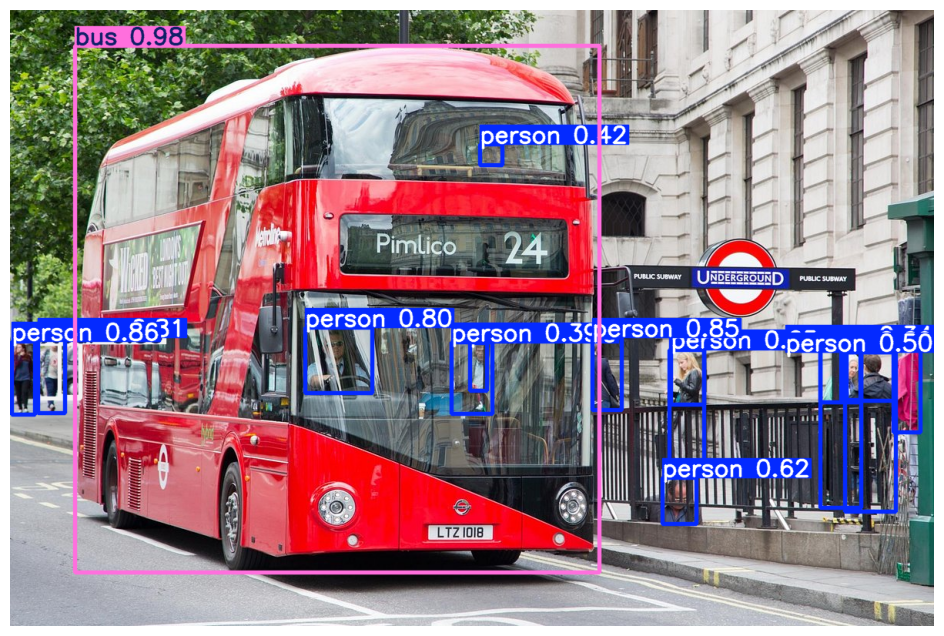

In [1]:
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt

# RTDETRモデルのダウンロードと初期化
try:
    model = RTDETR('rtdetr-l.pt')
except:
    wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    model = RTDETR('rtdetr-l.pt')

# 推論実行
image_path = 'london-buses.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())

# **Test new model**

In [ ]:
model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 推論実行
image_path = r'C:\Users\ykita\FacePhoto_instance\inference\cereba\000001.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())


In [14]:
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 推論を実行: YOLOの推論
image_path = r'C:\Users\ykita\FacePhoto_instance\inference\cereba\000001.jpg'
results = model(image_path, save=False)

for r in results:
    boxes = r.boxes  # YOLOv8の場合

    # YOLO形式出力
    for box in boxes:
        cls_id = int(box.cls[0])  # クラスID
        x_center, y_center, width, height = box.xywhn[0]

        # YOLO形式: class x_center y_center width height
        # 小数点以下6桁で出力したい場合
        print(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    # 検出結果を画像に描画して表示
    # plt.figure(figsize=(12, 8))
    # plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

    # 結果の保存
    #cv2.imwrite('result.jpg', r.plot())



image 1/1 C:\Users\ykita\FacePhoto_instance\inference\cereba\000001.jpg: 640x640 1 Right_eye, 1 Left_eye, 240.9ms
Speed: 12.3ms preprocess, 240.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
0 0.606280 0.523569 0.107366 0.027173
1 0.386395 0.505511 0.097299 0.033053



0: 640x640 1 Right_eye, 1 Left_eye, 242.4ms
Speed: 17.4ms preprocess, 242.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


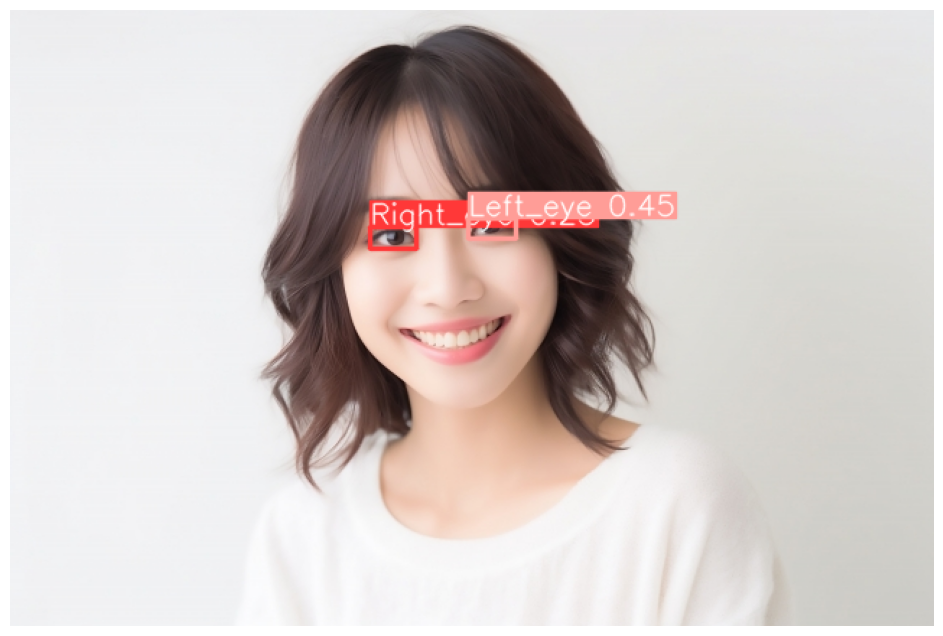

In [16]:
#Web画像の場合

from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 画像URLの指定
url = "https://365dentist.jp/wp-content/uploads/2023/06/26579868_s.jpg"

# 画像のダウンロード
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 推論実行
results = model(img)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# **RT-DETR トレーニングフォルダ構成**
```
project_root/
│
├── data/
│   ├── dataset.yaml       # データセットの設定ファイル
│   │
│   ├── train/
│   │   ├── images/       # トレーニング用の画像
│   │   │   ├── img1.jpg
│   │   │   ├── img2.jpg
│   │   │   └── ...
│   │   │
│   │   └── labels/      # トレーニング用のラベル（アノテーション）
│   │       ├── img1.txt
│   │       ├── img2.txt
│   │       └── ...
│   │
│   ├── val/
│   │   ├── images/      # 検証用の画像
│   │   │   ├── img1.jpg
│   │   │   └── ...
│   │   │
│   │   └── labels/     # 検証用のラベル
│   │       ├── img1.txt
│   │       └── ...
│   │
│   └── test/           # (オプション) テスト用のデータセット
│       ├── images/
│       └── labels/
│
└── dataset.yaml        # データセット設定ファイルの内容例:
```


## **dataset.yaml**

```
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ./data/images/train
val: ./data/images/valid

# number of classes
nc: 2

# class names:
  0: Right_eye
  1: Left_eye

```

In [ ]:
import shutil
import os
from tqdm import tqdm

# コピー元ディレクトリ
source_labels_dir = r'C:\Users\ykita\FacePhoto_instance\images-labels'
source_images_dir = r'C:\Users\ykita\FacePhoto_instance\images-labels'

# コピー先ディレクトリ
destination_labels_dir = r'C:\Users\ykita\FacePhoto_instance\data\labels'
destination_images_dir = r'C:\Users\ykita\FacePhoto_instance\data\images'

# 処理対象のディレクトリリスト
label_dir = ['Cereba-hq_1-9655_labels', '1-295_labels']
image_dir = ['Cereba-hq_1-9655_images', '1-295_images']

# destination_labels_dirとdestination_images_dirが存在する場合は削除し、新規作成する
if os.path.exists(destination_labels_dir):
    shutil.rmtree(destination_labels_dir)
os.makedirs(destination_labels_dir, exist_ok=True)

if os.path.exists(destination_images_dir):
    shutil.rmtree(destination_images_dir)
os.makedirs(destination_images_dir, exist_ok=True)

# ラベルファイルのコピー
for label_folder in tqdm(label_dir, desc="ラベルファイルのコピー中"):
    source_folder = os.path.join(source_labels_dir, label_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        files = os.listdir(source_folder)
        for file in files:
            src = os.path.join(source_folder, file)
            dst = os.path.join(destination_labels_dir, file)
            try:
                if os.path.isfile(src):  # ファイルであることを確認
                    shutil.copy(src, dst)
                    print(f"コピーしました: {src} -> {dst}")
            except PermissionError:
                print(f"権限エラー: {src} をコピーできませんでした")
            except Exception as e:
                print(f"エラー: {src} をコピー中に問題が発生しました: {e}")

# 画像ファイルのコピー
for image_folder in tqdm(image_dir, desc="画像ファイルのコピー中"):
    source_folder = os.path.join(source_images_dir, image_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        try:
            files = os.listdir(source_folder)
            for file in files:
                src = os.path.join(source_folder, file)
                dst = os.path.join(destination_images_dir, file)
                try:
                    if os.path.isfile(src):  # ファイルであることを確認
                        shutil.copy(src, dst)
                        print(f"コピーしました: {src} -> {dst}")
                except PermissionError:
                    print(f"権限エラー: {src} をコピーできませんでした")
                except Exception as e:
                    print(f"エラー: {src} をコピー中に問題が発生しました: {e}")
        except PermissionError:
            print(f"権限エラー: {source_folder} へのアクセスが拒否されました")
        except Exception as e:
            print(f"エラー: {source_folder} へのアクセス中に問題が発生しました: {e}")

In [27]:
# # データの前処理
# # 目的: 画像ファイルとラベルファイルの対応関係を確認
# # 処理内容:
# # 1. ラベルディレクトリとイメージディレクトリのパスを設定
# # 2. 各ディレクトリからファイル名(拡張子なし)を取得
# # 3. ラベルが存在しない画像ファイルを特定
# # 4. 不一致の数を表示

# import os

# # ラベルとイメージのディレクトリパス
# labels_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"
# images_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"

# # ラベルファイルの basename (拡張子なし) を取得
# label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}

# # 画像ファイルの basename (拡張子なし) を取得
# image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) 
#                if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff'))}

# # ラベルが存在しない画像ファイルを見つける
# images_without_labels = image_files - label_files

# # 結果を表示
# print(f"n_label_files: {len(label_files)}")
# print(f"n_image_files: {len(image_files)}")
# print(f"ラベルが存在しない画像ファイルの数: {len(images_without_labels)}")

n_label_files: 2287
n_image_files: 2287
ラベルが存在しない画像ファイルの数: 0


In [26]:
# ラベルが存在しない画像ファイルを削除
for img_name in images_without_labels:
    for ext in ['.jpg', '.jpeg', '.png', '.tif', '.tiff']:
        img_path_with_ext = os.path.join(images_dir, img_name + ext)
        if os.path.exists(img_path_with_ext):
            try:
                os.remove(img_path_with_ext)
                print(f"削除しました: {img_path_with_ext}")
            except OSError as e:
                print(f"削除に失敗しました {img_path_with_ext}: {e}")

# 画像が存在しないラベルファイルを削除
labels_without_images = label_files - image_files
for label_name in labels_without_images:
    label_path = os.path.join(labels_dir, label_name + '.txt')
    try:
        os.remove(label_path)
        print(f"削除しました: {label_path}")
    except OSError as e:
        print(f"削除に失敗しました {label_path}: {e}")

print("不一致ファイルの削除が完了しました")

削除しました: C:\Users\ykita\FacePhoto_instance\data\images\128-20190508-47-135005_fed5582711f2ebfae749ae7bc8ba6a1dfe8613ffc26cb4d585e4cb745c263c8b.tif
削除しました: C:\Users\ykita\FacePhoto_instance\data\images\128-20190508-47-134032_5db81163ba9370f7b47e896a86662b51eecc24df7b5e095a28e728cb3d823219.tif
不一致ファイルの削除が完了しました


In [24]:
# 1. 指定されたディレクトリから画像ファイル(.jpg, .png, .tif)を取得
# 2. 画像ファイルをランダムに並び替え
# 3. train/validディレクトリを作成
# 4. データを8:2の比率で分割
# 5. 画像ファイルと対応するラベルファイル(.txt)を適切なディレクトリに移動

import os
import shutil
import random
from tqdm import tqdm

# データディレクトリのパス設定
data_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
data_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"
src_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
src_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"

# ソースディレクトリの画像ファイルを直接取得（サブディレクトリを除く）
image_files = [f for f in os.listdir(src_img_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')) 
               and os.path.isfile(os.path.join(src_img_dir, f))]

if not image_files:
    print("エラー: 画像ファイルが見つかりません")
else:
    print(f"見つかった画像ファイル数: {len(image_files)}")
    
    # train/validディレクトリの作成
    for split in ['train', 'valid']:
        img_split_dir = os.path.join(data_img_dir, split)
        label_split_dir = os.path.join(data_label_dir, split)
        
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    # データの分割
    random.shuffle(image_files)
    train_size = int(len(image_files) * 0.8)
    train_files = image_files[:train_size]
    valid_files = image_files[train_size:]

    # ファイルの移動関数
    def move_files(files, split):
        for img_file in tqdm(files, desc=f"{split}データの移動"):
            try:
                # 画像ファイルの移動
                src_img_path = os.path.join(src_img_dir, img_file)
                dst_img_path = os.path.join(data_img_dir, split, img_file)
                
                if os.path.exists(src_img_path):
                    shutil.move(src_img_path, dst_img_path)

                # 対応するラベルファイルの移動
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label_path = os.path.join(src_label_dir, label_file)
                dst_label_path = os.path.join(data_label_dir, split, label_file)
                
                if os.path.exists(src_label_path):
                    shutil.move(src_label_path, dst_label_path)

            except Exception as e:
                print(f"エラーが発生しました ({img_file}): {str(e)}")

    # trainとvalidそれぞれにファイルを移動
    move_files(train_files, 'train')
    move_files(valid_files, 'valid')

    print(f"訓練データ数: {len(train_files)}")
    print(f"検証データ数: {len(valid_files)}")
    print("データの分割と移動が完了しました")

見つかった画像ファイル数: 981


validデータの移動: 100%|██████████| 197/197 [00:00<00:00, 777.49it/s]

訓練データ数: 784
検証データ数: 197
データの分割と移動が完了しました


In [28]:
######################################
## 患者ごとにstratifyして分割する場合 ##
######################################

import os
import shutil
import random
from tqdm import tqdm
from collections import defaultdict

# データディレクトリのパス設定
data_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
data_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"
src_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
src_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"

# ソースディレクトリの画像ファイルを取得
image_files = [f for f in os.listdir(src_img_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')) 
               and os.path.isfile(os.path.join(src_img_dir, f))]

if not image_files:
    print("エラー: 画像ファイルが見つかりません")
else:
    # 患者IDごとにファイルをグループ化
    patient_files = defaultdict(list)
    for img_file in image_files:
        patient_id = img_file.split('-')[0]  # 最初のハイフンより左の部分を患者IDとして取得
        patient_files[patient_id].append(img_file)
    
    print(f"総患者数: {len(patient_files)}")
    print(f"総画像ファイル数: {len(image_files)}")
    
    # train/validディレクトリの作成
    for split in ['train', 'valid']:
        img_split_dir = os.path.join(data_img_dir, split)
        label_split_dir = os.path.join(data_label_dir, split)
        
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    # 患者IDのリストを作成してシャッフル
    patient_ids = list(patient_files.keys())
    random.shuffle(patient_ids)
    
    # 患者IDを8:2で分割
    train_size = int(len(patient_ids) * 0.8)
    train_patient_ids = set(patient_ids[:train_size])
    valid_patient_ids = set(patient_ids[train_size:])
    
    # 分割されたファイルリストを作成
    train_files = [f for pid in train_patient_ids for f in patient_files[pid]]
    valid_files = [f for pid in valid_patient_ids for f in patient_files[pid]]

    # ファイルの移動関数
    def move_files(files, split):
        for img_file in tqdm(files, desc=f"{split}データの移動"):
            try:
                # 画像ファイルの移動
                src_img_path = os.path.join(src_img_dir, img_file)
                dst_img_path = os.path.join(data_img_dir, split, img_file)
                
                if os.path.exists(src_img_path):
                    shutil.move(src_img_path, dst_img_path)

                # 対応するラベルファイルの移動
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label_path = os.path.join(src_label_dir, label_file)
                dst_label_path = os.path.join(data_label_dir, split, label_file)
                
                if os.path.exists(src_label_path):
                    shutil.move(src_label_path, dst_label_path)

            except Exception as e:
                print(f"エラーが発生しました ({img_file}): {str(e)}")

    # trainとvalidそれぞれにファイルを移動
    move_files(train_files, 'train')
    move_files(valid_files, 'valid')

    print(f"訓練データの患者数: {len(train_patient_ids)}")
    print(f"検証データの患者数: {len(valid_patient_ids)}")
    print(f"訓練データの画像数: {len(train_files)}")
    print(f"検証データの画像数: {len(valid_files)}")
    print("データの分割と移動が完了しました")

総患者数: 289
総画像ファイル数: 2287


validデータの移動: 100%|██████████| 547/547 [00:00<00:00, 652.82it/s]

訓練データの患者数: 231
検証データの患者数: 58
訓練データの画像数: 1740
検証データの画像数: 547
データの分割と移動が完了しました


## **YAMLファイルを作成**

In [2]:
import yaml
import os

data = {
    'train': r'C:\Users\ykita\FacePhoto_instance\data\images\train',
    'val': r'C:\Users\ykita\FacePhoto_instance\data\images\valid',
    'nc': 2,
    'names': {
        0: 'Right_eye',
        1: 'Left_eye',
    }
}

yaml_path = 'data/data.yaml'

# dataディレクトリが存在しない場合は作成
os.makedirs('data', exist_ok=True)

# ファイルの存在確認
if os.path.exists(yaml_path):
    print(f"既存の {yaml_path} を上書きします。")
else:
    print(f"新規に {yaml_path} を作成します。")

# YAMLファイルの書き出し（既存ファイルは上書き）
with open(yaml_path, 'w', encoding='utf-8') as f:
    yaml.safe_dump(data, f, sort_keys=False, allow_unicode=True)

print("処理が完了しました。")

既存の data/data.yaml を上書きします。
処理が完了しました。


# **Train RT-DETR**

In [1]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget

# RTDETRモデルのダウンロードと初期化
try:
    #model = RTDETR('rtdetr-l.pt')
    model = YOLO("yolo11lpt")  # load a pretrained model (recommended for training)
except:
    #wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    #model = RTDETR('rtdetr-l.pt')
    wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l.pt')
    model = YOLO("yolo11l.pt")  # load a pretrained model (recommended for training)

model = YOLO(r"C:\Users\ykita\FacePhoto_instance\runs\detect\train40\weights\last.pt")  # load a pretrained model (recommended for training)

# Fine-tune
results = model.train(data=r'C:\Users\ykita\FacePhoto_instance\data\data.yaml', epochs=1000, patience=100, batch=8, cache=False, multi_scale=True, fliplr=0, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.70 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.68  Python-3.8.6 torch-2.4.1+cu124 CUDA:0 (Quadro RTX 5000, 16384MiB)
engine\trainer: task=detect, mode=train, model=C:\Users\ykita\FacePhoto_instance\runs\detect\train40\weights\last.pt, data=C:\Users\ykita\FacePhoto_instance\data\data.yaml, epochs=1000, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train42, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agno

train: Scanning C:\Users\ykita\FacePhoto_instance\data\labels\train.cache... 1740 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1740/1740 [00:00<?, ?it/s]
val: Scanning C:\Users\ykita\FacePhoto_instance\data\labels\valid.cache... 547 images, 0 backgrounds, 0 corrupt: 100%|██████████| 547/547 [00:00<?, ?it/s]


Plotting labels to runs\detect\train42\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train42
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      12.2G     0.2852     0.1814     0.8354         19        864: 100%|██████████| 218/218 [01:40<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.87it/s]

                   all        547       1091      0.997      0.992      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      13.8G     0.2672     0.1723     0.8293         12        448: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.65it/s]

                   all        547       1091      0.994      0.993      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      13.2G     0.2834     0.1854     0.8256         17        672: 100%|██████████| 218/218 [01:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.71it/s]

                   all        547       1091      0.997      0.992      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      13.9G     0.3031     0.1994     0.8352         11        352: 100%|██████████| 218/218 [01:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.60it/s]

                   all        547       1091      0.995      0.989      0.994      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      13.7G     0.3092     0.2001     0.8386         21        864: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]

                   all        547       1091      0.994      0.989      0.994       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      13.5G     0.3046     0.2003     0.8355         18        480: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]

                   all        547       1091      0.997      0.988      0.994      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      14.3G     0.3036      0.198     0.8405         12        960: 100%|██████████| 218/218 [01:29<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.56it/s]

                   all        547       1091      0.994      0.992      0.994      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      13.7G       0.31     0.2029     0.8393         20        352: 100%|██████████| 218/218 [01:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.996      0.992      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000        14G        0.3     0.1976     0.8366         15        832: 100%|██████████| 218/218 [01:31<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.98it/s]

                   all        547       1091      0.997       0.99      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000        13G     0.3083     0.1982     0.8408         12        448: 100%|██████████| 218/218 [01:26<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]

                   all        547       1091      0.993      0.987      0.993      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000        14G     0.3054     0.2016     0.8377         20        864: 100%|██████████| 218/218 [01:27<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.15it/s]

                   all        547       1091      0.995       0.99      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      12.5G      0.304     0.1989     0.8385         16        672: 100%|██████████| 218/218 [01:26<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]

                   all        547       1091      0.995      0.992      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      12.4G     0.3072     0.2025     0.8376          8        352: 100%|██████████| 218/218 [01:29<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.87it/s]

                   all        547       1091      0.996      0.992      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      13.7G     0.2995     0.2007     0.8407         17        704: 100%|██████████| 218/218 [01:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.87it/s]

                   all        547       1091      0.994      0.991      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      13.5G      0.302     0.2021      0.838         11        576: 100%|██████████| 218/218 [01:33<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.85it/s]

                   all        547       1091      0.995      0.988      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000        14G     0.3046     0.2024     0.8429          9        832: 100%|██████████| 218/218 [01:29<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]

                   all        547       1091      0.997      0.989      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      13.1G     0.3059     0.2014     0.8402         12        704: 100%|██████████| 218/218 [01:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]

                   all        547       1091      0.996      0.989      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      13.5G     0.2958     0.1983     0.8368         14        928: 100%|██████████| 218/218 [01:29<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]

                   all        547       1091      0.993       0.99      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      12.8G     0.2973     0.1983     0.8319          7        864: 100%|██████████| 218/218 [01:26<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.15it/s]

                   all        547       1091      0.995      0.993      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      12.8G     0.3054     0.2034     0.8368         13        480: 100%|██████████| 218/218 [01:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]

                   all        547       1091      0.994      0.994      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      13.2G     0.3006     0.1973       0.84         12        960: 100%|██████████| 218/218 [01:28<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]

                   all        547       1091      0.995      0.993      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      13.8G      0.296     0.1951     0.8329         15        960: 100%|██████████| 218/218 [01:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.68it/s]

                   all        547       1091      0.994      0.992      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      14.5G     0.3026     0.1998     0.8417         20        768: 100%|██████████| 218/218 [01:30<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]

                   all        547       1091      0.996      0.989      0.994      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      12.8G     0.3018     0.1966     0.8357         13        320: 100%|██████████| 218/218 [01:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.13it/s]

                   all        547       1091      0.995      0.995      0.994      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      13.7G     0.3013     0.1939     0.8353          9        800: 100%|██████████| 218/218 [01:26<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]

                   all        547       1091      0.994      0.992      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      13.9G     0.3024     0.1935      0.837         12        320: 100%|██████████| 218/218 [01:28<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.76it/s]

                   all        547       1091      0.996      0.992      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      13.5G     0.3053     0.1935     0.8392         12        896: 100%|██████████| 218/218 [01:28<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.996       0.99      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      13.1G     0.3021     0.1983     0.8327         21        352: 100%|██████████| 218/218 [01:29<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.11it/s]

                   all        547       1091      0.997      0.989      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      13.1G     0.2967     0.2018     0.8333         16        960: 100%|██████████| 218/218 [01:29<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.12it/s]

                   all        547       1091      0.996      0.987      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      13.1G     0.2953     0.1982     0.8356         13        384: 100%|██████████| 218/218 [01:32<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.76it/s]

                   all        547       1091      0.995      0.995      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      13.2G     0.2956     0.1986     0.8381         17        320: 100%|██████████| 218/218 [01:31<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.05it/s]

                   all        547       1091      0.995       0.99      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      13.2G      0.298     0.1988     0.8321         16        960: 100%|██████████| 218/218 [01:26<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]

                   all        547       1091       0.99      0.989      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      14.1G     0.2846     0.1912     0.8294          8        512: 100%|██████████| 218/218 [01:28<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.995      0.992      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      12.9G     0.2948     0.1931      0.834         15        576: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.48it/s]

                   all        547       1091      0.995      0.989      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      12.8G     0.2889     0.1932     0.8269          7        480: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.04it/s]

                   all        547       1091      0.995      0.995      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      13.8G     0.2946     0.1925     0.8354         13        640: 100%|██████████| 218/218 [01:29<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]

                   all        547       1091      0.995      0.991      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      12.7G     0.2958     0.1959     0.8335         20        800: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.39it/s]

                   all        547       1091      0.992      0.984      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      13.6G     0.2945     0.1936     0.8339         16        800: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]

                   all        547       1091      0.995      0.989      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      13.2G     0.2931     0.1907     0.8363         12        608: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]

                   all        547       1091      0.992      0.994      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      13.3G     0.2901     0.1904     0.8345         15        320: 100%|██████████| 218/218 [01:31<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]

                   all        547       1091      0.996      0.991      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      13.1G     0.2939     0.1916     0.8345          7        448: 100%|██████████| 218/218 [01:30<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]

                   all        547       1091      0.997      0.984      0.994       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      13.4G     0.2961     0.1928      0.837         19        768: 100%|██████████| 218/218 [01:28<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.23it/s]

                   all        547       1091      0.997      0.988      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      13.5G     0.3002     0.1978     0.8393          8        736: 100%|██████████| 218/218 [01:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.54it/s]

                   all        547       1091      0.994      0.995      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      12.9G     0.3011     0.1926     0.8348         18        576: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]

                   all        547       1091      0.994      0.996      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      12.6G     0.2943     0.1906     0.8319         12        544: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.07it/s]

                   all        547       1091      0.994      0.994      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      12.8G     0.2897     0.1897     0.8328         14        320: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.996      0.991      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      12.7G      0.292     0.1887     0.8316         18        864: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]

                   all        547       1091      0.995      0.992      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000        14G     0.2919     0.1926     0.8408         14        864: 100%|██████████| 218/218 [01:26<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.11it/s]

                   all        547       1091      0.995      0.992      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      13.8G     0.2878     0.1907     0.8324         11        416: 100%|██████████| 218/218 [01:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.66it/s]

                   all        547       1091      0.995      0.993      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      14.5G     0.2943     0.1945     0.8345         12        480: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.12it/s]

                   all        547       1091      0.996      0.991      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      13.7G     0.2906     0.1909     0.8362         10        800: 100%|██████████| 218/218 [01:28<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.81it/s]

                   all        547       1091      0.994      0.994      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      13.6G      0.293     0.1893     0.8357         11        672: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]

                   all        547       1091      0.994      0.983      0.993      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      13.5G     0.2911     0.1895     0.8346         10        352: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.50it/s]

                   all        547       1091      0.996      0.994      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      12.7G      0.289     0.1907     0.8358          9        640: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.993      0.992      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      13.2G     0.2943     0.1934     0.8333         20        928: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.67it/s]

                   all        547       1091      0.997      0.993      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      13.1G     0.2871     0.1936     0.8348         12        896: 100%|██████████| 218/218 [01:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        547       1091      0.994      0.987      0.994       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      14.3G     0.2807     0.1873     0.8298          8        384: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.85it/s]

                   all        547       1091      0.993      0.992      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      12.8G     0.2808     0.1869     0.8309         17        448: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.995      0.995      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      12.8G     0.2878     0.1886     0.8346          8        640: 100%|██████████| 218/218 [01:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.995      0.998      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      12.5G     0.2902     0.1906     0.8324          9        512: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.89it/s]

                   all        547       1091      0.997      0.995      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      13.7G     0.2845      0.191     0.8317         11        384: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.995      0.992      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000        13G     0.2969     0.1925     0.8378         14        736: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.994      0.991      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      12.5G     0.2926     0.1897     0.8316         16        512: 100%|██████████| 218/218 [01:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.993      0.991      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      12.9G     0.2939     0.1919     0.8377         12        320: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.993      0.992      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      13.9G     0.2873     0.1931     0.8303         13        352: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.12it/s]

                   all        547       1091      0.993      0.992      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      13.8G     0.2884     0.1905     0.8294         11        512: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.994      0.992      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      13.2G     0.2878     0.1865     0.8372         10        512: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.994      0.985      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      12.9G     0.2849     0.1886     0.8289         16        832: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.72it/s]

                   all        547       1091      0.996      0.992      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      13.8G     0.2914     0.1934     0.8375         15        320: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]

                   all        547       1091      0.996      0.993      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      13.6G      0.284     0.1903     0.8341         11        768: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.76it/s]

                   all        547       1091      0.995      0.989      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      13.1G     0.2913     0.1918     0.8327         19        704: 100%|██████████| 218/218 [01:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.996      0.993      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      13.1G     0.2929     0.1881     0.8365         12        320: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.994      0.992      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      13.1G     0.2866     0.1877     0.8341          7        736: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.80it/s]

                   all        547       1091      0.997      0.992      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      13.3G     0.2856     0.1864     0.8347         13        512: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.44it/s]

                   all        547       1091      0.997      0.988      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      13.3G     0.2936     0.1901     0.8341         23        384: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.997      0.993      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      13.5G     0.2861     0.1883     0.8309         20        768: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.997      0.988      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      12.7G     0.2822     0.1857     0.8312         16        768: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.996      0.992      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      13.1G     0.2841     0.1849     0.8306         15        672: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.995      0.989      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      12.9G     0.2753     0.1777     0.8279         16        480: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.996      0.992      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      13.5G     0.2872     0.1892     0.8306         17        672: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.996      0.993      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      13.7G     0.2845     0.1854     0.8349         13        384: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.995      0.994      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      12.9G     0.2828     0.1897     0.8343         12        896: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]

                   all        547       1091      0.995      0.992      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      13.2G     0.2895     0.1943     0.8331          8        704: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.993      0.992      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      13.6G     0.2844     0.1846     0.8286         14        480: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]

                   all        547       1091      0.995      0.992      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      12.8G      0.288     0.1894     0.8331         14        640: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.87it/s]

                   all        547       1091      0.996      0.992      0.994      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      13.3G     0.2898     0.1914     0.8318         13        512: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.15it/s]

                   all        547       1091      0.995      0.987      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      13.7G     0.2818     0.1822     0.8319          9        736: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]

                   all        547       1091      0.994      0.993      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      12.5G     0.2845     0.1852     0.8275         20        704: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.39it/s]

                   all        547       1091      0.995       0.99      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      13.9G     0.2834     0.1843     0.8247         12        704: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.35it/s]

                   all        547       1091      0.997       0.99      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      13.9G     0.2804     0.1856      0.837         16        864: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.997      0.993      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      13.1G     0.2801     0.1807     0.8337         15        704: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]

                   all        547       1091      0.994      0.988      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      12.9G     0.2839     0.1846     0.8313         12        768: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]

                   all        547       1091      0.996      0.993      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      12.7G     0.2836     0.1805     0.8317         16        512: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.40it/s]

                   all        547       1091      0.995      0.992      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      13.6G     0.2883     0.1843     0.8328         20        416: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.37it/s]

                   all        547       1091      0.995      0.989      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      12.7G     0.2822     0.1789     0.8289          9        416: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.997      0.989      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000        13G     0.2894     0.1914      0.834         15        768: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]

                   all        547       1091      0.994      0.989      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      13.6G     0.2857     0.1873     0.8311         13        704: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.992      0.995      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      13.7G     0.2845     0.1844     0.8293         24        384: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.45it/s]

                   all        547       1091      0.995      0.997      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      13.6G     0.2875     0.1879     0.8307         10        736: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.11it/s]

                   all        547       1091      0.996      0.992      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      13.5G     0.2777     0.1848     0.8316         18        384: 100%|██████████| 218/218 [01:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.994       0.99      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      14.4G     0.2774     0.1837     0.8269         14        736: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.995      0.991      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      13.6G     0.2842     0.1877     0.8352          9        480: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.994      0.993      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      13.8G     0.2843     0.1872     0.8294         13        544: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]

                   all        547       1091      0.996      0.987      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      12.5G     0.2855     0.1884     0.8336         24        384: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]

                   all        547       1091      0.995      0.992      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      12.8G      0.273     0.1806     0.8264         19        832: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.991      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      13.6G     0.2807     0.1831     0.8314         13        736: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.84it/s]

                   all        547       1091      0.991      0.991      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      13.1G     0.2792     0.1832     0.8327         18        448: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.996      0.993      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      12.5G     0.2818     0.1824     0.8316         15        544: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.995      0.993      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      13.5G      0.285     0.1812      0.833         15        416: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]

                   all        547       1091      0.972      0.987      0.993       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      13.3G     0.2811     0.1818     0.8288         16        896: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]

                   all        547       1091      0.997      0.992      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      12.8G     0.2821     0.1791     0.8348         16        448: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.995      0.991      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      13.8G     0.2777     0.1804       0.83          9        608: 100%|██████████| 218/218 [01:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]

                   all        547       1091      0.991      0.993      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      12.6G     0.2745     0.1764     0.8303         11        416: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.994       0.99      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000        13G       0.28     0.1828      0.833         21        544: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.991      0.991      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      13.4G     0.2748     0.1769     0.8272         15        832: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.48it/s]

                   all        547       1091      0.991       0.99      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      12.8G     0.2852     0.1853     0.8331         12        448: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.989      0.991      0.993      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      13.2G     0.2806     0.1865      0.831         12        448: 100%|██████████| 218/218 [01:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        547       1091      0.991      0.982      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      12.7G      0.278     0.1811     0.8307         11        448: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.993      0.991      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      14.1G     0.2911     0.1918     0.8347         16        480: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.995      0.994      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      13.3G     0.2846     0.1879     0.8338         13        832: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]

                   all        547       1091      0.996      0.995      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      12.6G      0.276     0.1817     0.8317         20        352: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        547       1091      0.997      0.994      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      13.5G     0.2763      0.184     0.8275          8        640: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.996      0.987      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      12.8G     0.2704     0.1789     0.8277          8        352: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.996      0.993      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      13.9G     0.2711     0.1823     0.8285         12        736: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.995      0.986      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      14.4G     0.2747     0.1816     0.8294         16        384: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.48it/s]

                   all        547       1091      0.996      0.995      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      13.5G     0.2739     0.1798     0.8299          8        480: 100%|██████████| 218/218 [01:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.995      0.995      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000        14G     0.2742     0.1807     0.8312         14        960: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.997       0.99      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      12.7G      0.272     0.1785     0.8254          8        832: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.995      0.997      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      13.2G     0.2655     0.1746     0.8238         11        576: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]

                   all        547       1091      0.996      0.995      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      12.7G     0.2748     0.1825     0.8246          8        480: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.01it/s]

                   all        547       1091      0.996      0.991      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000        14G     0.2709     0.1795     0.8215         16        960: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.994      0.988      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000        13G     0.2692     0.1738     0.8293         11        416: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.995      0.993      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000        13G     0.2796     0.1815     0.8291         13        768: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.997       0.99      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      12.5G      0.267       0.18     0.8266         11        352: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.33it/s]

                   all        547       1091      0.996      0.994      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      13.5G     0.2818     0.1807     0.8311         19        544: 100%|██████████| 218/218 [01:17<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.996      0.995      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      13.6G       0.27     0.1746     0.8246         20        800: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.38it/s]

                   all        547       1091      0.996      0.993      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      12.8G     0.2719     0.1783     0.8245         13        704: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.995      0.995      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      12.9G     0.2682     0.1743     0.8295         16        800: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.997      0.989      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      12.5G     0.2758     0.1783     0.8273         12        544: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.996      0.994      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      13.7G      0.272     0.1798     0.8251         16        352: 100%|██████████| 218/218 [01:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.997      0.996      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      13.6G      0.273     0.1774     0.8283          9        704: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.995      0.993      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      13.2G     0.2687     0.1756     0.8259          6        672: 100%|██████████| 218/218 [01:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        547       1091      0.996      0.993      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000        13G     0.2712     0.1786     0.8238         16        736: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]

                   all        547       1091      0.996      0.994      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      12.8G     0.2672     0.1784     0.8254         16        544: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]

                   all        547       1091      0.994      0.989      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      13.7G     0.2773     0.1774     0.8226         20        480: 100%|██████████| 218/218 [01:17<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]

                   all        547       1091      0.994      0.991      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      12.9G      0.276     0.1811     0.8284         14        352: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.995      0.997      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      12.6G     0.2664     0.1769     0.8212          7        576: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.994      0.993      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      13.6G     0.2757     0.1795     0.8288         14        768: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.95it/s]

                   all        547       1091      0.996      0.988      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      13.8G     0.2803     0.1791     0.8262         16        864: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.45it/s]

                   all        547       1091      0.993      0.997      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      13.2G     0.2726     0.1744     0.8275         14        864: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.16it/s]

                   all        547       1091      0.995      0.994      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000        13G     0.2727     0.1741     0.8256         18        736: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.46it/s]

                   all        547       1091      0.995      0.992      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      12.5G      0.268     0.1745     0.8284         13        384: 100%|██████████| 218/218 [01:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.42it/s]

                   all        547       1091      0.996      0.993      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      13.9G     0.2727     0.1806     0.8307         13        960: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]

                   all        547       1091      0.995      0.994      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      13.6G      0.273     0.1781     0.8212         20        672: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.996      0.996      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      12.7G     0.2663      0.174     0.8261         18        416: 100%|██████████| 218/218 [01:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.38it/s]

                   all        547       1091      0.997      0.995      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000        13G     0.2656     0.1749     0.8228         14        960: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.996      0.989      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      12.5G     0.2706     0.1735     0.8332         16        608: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.997      0.992      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      13.2G     0.2685     0.1747     0.8338         12        960: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.38it/s]

                   all        547       1091      0.997      0.989      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000        13G     0.2739      0.178     0.8296         15        608: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.995      0.992      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      13.1G     0.2624     0.1721     0.8268         15        608: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.86it/s]

                   all        547       1091      0.996      0.994      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      13.9G      0.271     0.1762     0.8273          9        448: 100%|██████████| 218/218 [01:15<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.35it/s]

                   all        547       1091      0.997      0.996      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000        13G     0.2661     0.1731      0.827         12        800: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.996      0.994      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      13.5G     0.2646     0.1731     0.8278         15        352: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.996      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      12.8G     0.2691     0.1755     0.8264         16        608: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]

                   all        547       1091      0.996      0.993      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000        13G     0.2654     0.1709     0.8244         12        768: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.997       0.99      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      12.8G     0.2678     0.1724     0.8335         12        672: 100%|██████████| 218/218 [01:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.35it/s]

                   all        547       1091      0.996      0.995      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      12.9G     0.2665     0.1732     0.8245         19        640: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.996      0.995      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      13.7G     0.2599     0.1706     0.8255          8        352: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.85it/s]

                   all        547       1091      0.995      0.995      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      12.8G     0.2701     0.1746     0.8268          9        448: 100%|██████████| 218/218 [01:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]

                   all        547       1091      0.994      0.995      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      12.7G     0.2655     0.1701     0.8277         22        608: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.43it/s]

                   all        547       1091      0.997      0.994      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      12.5G     0.2631     0.1684     0.8259         14        768: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.995      0.996      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      12.5G     0.2771     0.1757     0.8308         10        544: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.997      0.989      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      12.6G     0.2761     0.1741      0.835         14        416: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.992      0.994      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      12.9G     0.2685     0.1755     0.8269         14        544: 100%|██████████| 218/218 [01:16<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.995       0.99      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      13.7G     0.2676     0.1721      0.826         13        672: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.996      0.989      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      12.8G     0.2744     0.1751      0.825         24        736: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.99it/s]

                   all        547       1091      0.997      0.991      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      14.5G     0.2628     0.1696     0.8286          9        384: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.995      0.993      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      12.7G     0.2634     0.1696     0.8236         15        544: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.98it/s]

                   all        547       1091      0.994      0.992      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      13.4G     0.2623     0.1729     0.8285         18        960: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]

                   all        547       1091      0.996      0.992      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      12.3G     0.2674     0.1728     0.8251         11        736: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]

                   all        547       1091      0.994      0.994      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      13.8G     0.2693     0.1763      0.826         16        512: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]

                   all        547       1091      0.994      0.994      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      12.7G     0.2643     0.1746     0.8269         17        544: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.39it/s]

                   all        547       1091      0.995      0.993      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      14.3G     0.2704     0.1722     0.8291         18        352: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.997      0.996      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      13.5G     0.2627     0.1704     0.8265         14        960: 100%|██████████| 218/218 [01:16<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]

                   all        547       1091      0.995      0.995      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      13.2G     0.2638     0.1746     0.8195         14        544: 100%|██████████| 218/218 [01:15<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.996      0.994      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      14.4G     0.2646     0.1684     0.8246         25        672: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.995      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000        14G     0.2615     0.1714     0.8209         15        800: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.997      0.995      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      13.7G     0.2634     0.1727     0.8267         16        640: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.01it/s]

                   all        547       1091      0.996      0.994      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      12.8G     0.2641     0.1754     0.8231         18        736: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.35it/s]

                   all        547       1091      0.996      0.995      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      13.6G     0.2637      0.174     0.8235         10        544: 100%|██████████| 218/218 [01:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.995      0.995      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      12.5G     0.2614     0.1705     0.8271         14        480: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]

                   all        547       1091      0.995      0.992      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      13.3G     0.2685     0.1756     0.8274         14        832: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.45it/s]

                   all        547       1091      0.995      0.992      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      13.5G     0.2729     0.1801      0.828         15        896: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]

                   all        547       1091      0.995      0.989      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      13.3G     0.2608     0.1695     0.8231         13        448: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.07it/s]

                   all        547       1091      0.996      0.992      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      13.6G     0.2584     0.1657     0.8232         20        640: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.38it/s]

                   all        547       1091      0.992       0.99      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      12.8G     0.2556     0.1668     0.8216         15        320: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]

                   all        547       1091      0.993      0.989      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      13.3G     0.2597     0.1695     0.8245         15        896: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]

                   all        547       1091      0.994      0.993      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      13.9G     0.2591     0.1707     0.8244          8        800: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.94it/s]

                   all        547       1091      0.995      0.992      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      13.4G     0.2639     0.1727     0.8208         12        320: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.95it/s]

                   all        547       1091      0.995      0.993      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      13.8G     0.2617     0.1678     0.8251         15        416: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]

                   all        547       1091      0.995      0.993      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      13.7G     0.2665     0.1705     0.8244          8        704: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]

                   all        547       1091      0.996      0.996      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      13.6G     0.2681     0.1731     0.8248         14        928: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.98it/s]

                   all        547       1091      0.997      0.993      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      13.7G     0.2675      0.173     0.8245         16        736: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.995      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000        13G     0.2645     0.1699     0.8217         17        448: 100%|██████████| 218/218 [01:15<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]

                   all        547       1091      0.996      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000        13G      0.263     0.1687     0.8232         10        800: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.09it/s]

                   all        547       1091      0.995      0.994      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      13.8G     0.2655     0.1714      0.822         15        896: 100%|██████████| 218/218 [01:17<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.44it/s]

                   all        547       1091      0.996      0.992      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      13.9G     0.2553     0.1682     0.8282          9        704: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]

                   all        547       1091      0.993      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      12.6G     0.2592     0.1642     0.8234         12        352: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.91it/s]

                   all        547       1091      0.996      0.994      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000        13G     0.2635     0.1688     0.8222         12        768: 100%|██████████| 218/218 [01:14<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.07it/s]

                   all        547       1091      0.996      0.994      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      13.6G     0.2606      0.169     0.8249         16        384: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.95it/s]

                   all        547       1091      0.996      0.992      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      12.6G     0.2584     0.1657      0.823         12        832: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.995      0.988      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      13.7G     0.2542     0.1636     0.8285         16        864: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.996      0.995      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000        13G      0.261     0.1659     0.8272         11        864: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.96it/s]

                   all        547       1091      0.996      0.996      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      13.6G     0.2569     0.1657     0.8219         13        736: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.35it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      13.3G     0.2616     0.1671     0.8256         14        544: 100%|██████████| 218/218 [01:16<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.38it/s]

                   all        547       1091      0.997      0.992      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      13.7G     0.2639     0.1679     0.8231         22        800: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.997      0.992      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      12.9G     0.2664     0.1695     0.8268         20        512: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.996      0.992      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      12.5G     0.2654     0.1736      0.828         14        704: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.996      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000        13G     0.2666     0.1697     0.8263         16        576: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.996      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      13.6G     0.2587     0.1638     0.8226         18        352: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.997      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000      13.5G     0.2572     0.1659     0.8199         14        672: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.10it/s]

                   all        547       1091      0.997      0.994      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000      13.9G      0.258     0.1695     0.8193         17        864: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.40it/s]

                   all        547       1091      0.996      0.996      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      13.2G     0.2568     0.1664       0.82         20        320: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]

                   all        547       1091      0.995      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      13.6G     0.2585     0.1682     0.8236         19        736: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.997      0.993      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      13.9G     0.2552     0.1652     0.8229         12        576: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.996      0.993      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000      12.8G     0.2582     0.1654     0.8203         13        416: 100%|██████████| 218/218 [01:16<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.50it/s]

                   all        547       1091      0.995      0.996      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000        13G     0.2607     0.1665     0.8214         18        768: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.93it/s]

                   all        547       1091      0.991      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      13.3G     0.2707     0.1684     0.8245         11        960: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.986       0.99      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      12.2G     0.2584     0.1659     0.8228         10        480: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]

                   all        547       1091      0.992       0.99      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      12.7G     0.2598     0.1673      0.822         18        480: 100%|██████████| 218/218 [01:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.996      0.991      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      12.8G     0.2561     0.1675     0.8223         24        512: 100%|██████████| 218/218 [01:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]

                   all        547       1091      0.993      0.992      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      13.6G     0.2596       0.17     0.8229         15        704: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]

                   all        547       1091      0.993      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000      13.1G       0.26      0.167     0.8272         16        704: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.99it/s]

                   all        547       1091      0.995      0.996      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      13.8G     0.2583     0.1645     0.8278         15        448: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.84it/s]

                   all        547       1091      0.997      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000      13.7G     0.2612     0.1653     0.8252         21        672: 100%|██████████| 218/218 [01:17<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.42it/s]

                   all        547       1091      0.996      0.991      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      13.1G     0.2533     0.1625      0.818         21        832: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.44it/s]

                   all        547       1091      0.996       0.99      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      13.6G     0.2586     0.1649     0.8213          9        864: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.995      0.989      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      12.9G     0.2612     0.1687     0.8232         10        864: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.997      0.991      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000        13G     0.2617      0.167     0.8246         15        768: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.35it/s]

                   all        547       1091      0.995       0.99      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000      12.9G     0.2609     0.1699     0.8259         17        608: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.09it/s]

                   all        547       1091      0.997      0.989      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      13.9G     0.2494     0.1648     0.8241         15        832: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.996      0.991      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000        13G      0.264     0.1732     0.8258         13        736: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]

                   all        547       1091      0.995      0.992      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      13.3G     0.2514     0.1621     0.8193         20        640: 100%|██████████| 218/218 [01:16<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.41it/s]

                   all        547       1091      0.997      0.992      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000      13.3G     0.2572     0.1683     0.8226         20        768: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.48it/s]

                   all        547       1091      0.995      0.992      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000        13G     0.2516     0.1666     0.8184         12        832: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.995      0.991      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      12.9G     0.2527     0.1636     0.8192         14        736: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.995      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000      12.9G     0.2485     0.1631     0.8222         12        640: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.996      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      13.3G      0.249     0.1717     0.8224         15        736: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.996      0.991      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000      13.3G     0.2597     0.1706     0.8224         15        768: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.997      0.992      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000      13.2G     0.2552      0.167     0.8201         16        576: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.45it/s]

                   all        547       1091      0.997      0.992      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000      13.7G     0.2546      0.169     0.8234         17        832: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]

                   all        547       1091      0.997      0.992      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000      12.8G     0.2534     0.1656     0.8183         21        448: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.996      0.992      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000      13.3G     0.2618       0.17     0.8207         21        320: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.993      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000      12.9G     0.2637     0.1749     0.8169          8        480: 100%|██████████| 218/218 [01:16<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.996      0.994      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000      12.9G     0.2554     0.1682     0.8203         15        576: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.996      0.996      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000      13.2G     0.2533     0.1696     0.8204         14        480: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]

                   all        547       1091      0.996      0.994      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      13.5G     0.2519     0.1658     0.8136         14        864: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        547       1091      0.995      0.993      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      12.6G     0.2539     0.1661     0.8179         19        608: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.994      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      12.7G     0.2515     0.1633     0.8181         10        608: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.995      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      13.6G     0.2513     0.1631     0.8162         16        928: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]

                   all        547       1091      0.996      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      13.3G     0.2567      0.166     0.8199         14        448: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.997      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000      12.6G     0.2508      0.161     0.8246         15        864: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.994      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000        13G     0.2552     0.1642     0.8205         23        448: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.996      0.991      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000      12.7G     0.2535     0.1663     0.8159         20        352: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.997      0.991      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000      13.6G     0.2492     0.1624     0.8183         16        864: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.18it/s]

                   all        547       1091      0.995      0.991      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      13.1G     0.2527     0.1619     0.8185         18        608: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.49it/s]

                   all        547       1091      0.996      0.992      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      13.8G     0.2544     0.1623     0.8208         15        832: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.995      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      14.2G     0.2516     0.1626     0.8216         24        928: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.21it/s]

                   all        547       1091      0.995      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      13.8G     0.2544     0.1628     0.8164         11        896: 100%|██████████| 218/218 [01:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.994      0.996      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      13.9G      0.257     0.1674     0.8193         10        352: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.09it/s]

                   all        547       1091      0.995      0.994      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      14.5G     0.2541     0.1651     0.8238         16        640: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.993      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000      14.1G     0.2561     0.1643     0.8205         11        704: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]

                   all        547       1091      0.995      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      12.7G     0.2571     0.1619     0.8184         15        896: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.995      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      13.4G     0.2518     0.1619     0.8228         16        640: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000        13G     0.2436     0.1578      0.811         17        768: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.33it/s]

                   all        547       1091      0.995      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      12.6G     0.2572     0.1653     0.8191         20        320: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000        13G     0.2528     0.1635     0.8208         12        576: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000      12.8G     0.2566     0.1631     0.8193         18        320: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000      13.9G     0.2466     0.1571      0.814         16        384: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      13.1G     0.2532     0.1596     0.8187         13        672: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.995      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      13.3G     0.2483     0.1585     0.8173         11        576: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all        547       1091      0.995      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      12.8G     0.2497       0.16     0.8173         14        480: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.33it/s]

                   all        547       1091      0.995      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      13.4G     0.2458     0.1598     0.8168         13        896: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.996      0.992      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000      13.1G     0.2505     0.1599     0.8194         11        448: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.996      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/1000      13.1G     0.2479     0.1585     0.8128         13        672: 100%|██████████| 218/218 [01:15<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.995      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/1000      13.9G     0.2535     0.1613     0.8168         14        320: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.995      0.991      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/1000      14.4G     0.2491     0.1607     0.8206         14        448: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.996      0.992      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/1000      12.9G     0.2516     0.1638     0.8208         16        384: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.996      0.991      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/1000      13.2G     0.2504     0.1608     0.8196         11        672: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.994      0.991      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/1000      12.9G     0.2462     0.1568     0.8226         16        960: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.17it/s]

                   all        547       1091      0.996       0.99      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/1000      13.3G     0.2482     0.1611     0.8149         15        416: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.997      0.992      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   292/1000        13G     0.2476     0.1596     0.8188         12        960: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.997      0.994      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   293/1000      13.8G     0.2479     0.1598     0.8187         13        736: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.33it/s]

                   all        547       1091      0.997      0.994      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   294/1000      13.4G     0.2444     0.1583     0.8172         17        768: 100%|██████████| 218/218 [01:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.995      0.994      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   295/1000      13.1G     0.2479     0.1635       0.82         12        544: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.996      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   296/1000      13.5G     0.2471     0.1623     0.8177         14        384: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]

                   all        547       1091      0.996      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   297/1000      13.8G     0.2447     0.1614     0.8192         12        512: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.997      0.992      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   298/1000      12.9G      0.244     0.1636     0.8182         13        320: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.997      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   299/1000      13.2G     0.2482     0.1626     0.8185         15        704: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   300/1000      13.3G     0.2536     0.1633     0.8201         15        384: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.996      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   301/1000      13.5G      0.253     0.1658     0.8166         14        480: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.995      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   302/1000      13.8G     0.2511      0.165     0.8194         14        352: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.997      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   303/1000      12.7G     0.2423     0.1582     0.8189          8        416: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]

                   all        547       1091      0.997      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   304/1000      13.5G     0.2409     0.1618     0.8177         16        768: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.997      0.992      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   305/1000      12.5G      0.245     0.1569     0.8222         14        768: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.996      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   306/1000      13.6G     0.2494     0.1633     0.8172         16        864: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.997      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   307/1000      12.5G       0.25     0.1633     0.8164         12        928: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.997      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   308/1000      13.9G     0.2403     0.1597     0.8213         11        320: 100%|██████████| 218/218 [01:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.21it/s]

                   all        547       1091      0.997      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   309/1000      13.7G     0.2432     0.1575     0.8193         15        480: 100%|██████████| 218/218 [01:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.90it/s]

                   all        547       1091      0.996      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   310/1000      13.1G     0.2461     0.1582     0.8166          7        320: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.997      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   311/1000      12.9G     0.2422     0.1588     0.8207         17        800: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.996      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   312/1000      13.2G     0.2374     0.1557     0.8191         14        800: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   313/1000      12.5G     0.2441     0.1557     0.8185         10        384: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.995      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   314/1000      13.7G     0.2492     0.1582     0.8169         15        768: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.995      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   315/1000      12.8G     0.2493     0.1581     0.8123         12        576: 100%|██████████| 218/218 [01:17<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all        547       1091      0.996      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   316/1000      13.8G     0.2457     0.1571     0.8226         16        864: 100%|██████████| 218/218 [01:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.92it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   317/1000      13.3G     0.2507       0.16     0.8165         10        928: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]

                   all        547       1091      0.996      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   318/1000      12.8G      0.247     0.1585     0.8161         16        768: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.996      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   319/1000      13.2G     0.2437     0.1582     0.8176         19        352: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]

                   all        547       1091      0.996      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   320/1000      12.9G     0.2468     0.1563     0.8209         12        960: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.996      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   321/1000      12.6G     0.2549     0.1623     0.8252         13        608: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   322/1000      12.5G     0.2426     0.1573      0.823         16        832: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.993      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   323/1000      13.4G     0.2442     0.1587     0.8175         20        448: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.996      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   324/1000      13.5G      0.247     0.1602     0.8215         12        672: 100%|██████████| 218/218 [01:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.81it/s]

                   all        547       1091      0.996      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   325/1000      13.8G     0.2439     0.1579     0.8192         17        608: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]

                   all        547       1091      0.996      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   326/1000      13.7G     0.2436     0.1575     0.8158         11        896: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]

                   all        547       1091      0.996      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   327/1000      13.5G     0.2377     0.1573      0.821         13        928: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   328/1000      14.3G      0.246     0.1581     0.8208         19        800: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.89it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   329/1000      12.3G     0.2485     0.1563     0.8178          8        864: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   330/1000      13.2G     0.2425     0.1556     0.8176         16        896: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.996      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   331/1000      13.1G      0.252     0.1577     0.8174         12        512: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   332/1000      13.4G     0.2446     0.1559      0.815         10        768: 100%|██████████| 218/218 [01:17<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.48it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   333/1000      12.8G     0.2382     0.1543     0.8175         17        640: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.995      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   334/1000      12.2G     0.2472     0.1558     0.8205         10        640: 100%|██████████| 218/218 [01:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.13it/s]

                   all        547       1091      0.994      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   335/1000      13.8G     0.2437     0.1557     0.8175         10        384: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.995      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   336/1000      12.8G     0.2392     0.1531     0.8157          7        768: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.995      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   337/1000        14G      0.242     0.1545     0.8172         13        352: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.995      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   338/1000      12.9G     0.2431      0.162     0.8179         16        480: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.997      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   339/1000      12.6G     0.2357     0.1536     0.8152         24        960: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.99it/s]

                   all        547       1091      0.997      0.994      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   340/1000      12.9G     0.2415     0.1589     0.8188         16        480: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.997      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   341/1000      13.8G     0.2419     0.1552      0.817         14        608: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.997      0.995      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   342/1000      13.6G     0.2316     0.1528     0.8159         18        576: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.84it/s]

                   all        547       1091      0.996      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   343/1000      13.9G     0.2477     0.1602     0.8168         17        672: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.995      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   344/1000      13.7G     0.2409      0.155     0.8209         15        544: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.994      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   345/1000      13.1G     0.2453     0.1599       0.82         14        416: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.996      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   346/1000      12.5G     0.2435     0.1565     0.8181         12        384: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.995      0.997      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   347/1000      12.6G     0.2348      0.156     0.8194         14        576: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]

                   all        547       1091      0.996      0.997      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   348/1000        13G     0.2359      0.155     0.8115         20        352: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.88it/s]

                   all        547       1091      0.996      0.997      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   349/1000        14G     0.2426     0.1564     0.8159         14        416: 100%|██████████| 218/218 [01:16<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.995      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   350/1000      12.7G     0.2366     0.1538     0.8159         10        928: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.996      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   351/1000      13.3G      0.243     0.1591      0.819         22        832: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   352/1000      12.8G     0.2362     0.1553     0.8204         10        512: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]

                   all        547       1091      0.996      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   353/1000      13.2G     0.2406     0.1557     0.8158         15        832: 100%|██████████| 218/218 [01:16<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.995      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   354/1000      12.8G     0.2351     0.1516      0.817         20        704: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.996      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   355/1000        14G     0.2377     0.1544     0.8215         14        448: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.995      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   356/1000      13.1G     0.2352     0.1538     0.8178          9        768: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.03it/s]

                   all        547       1091      0.995      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   357/1000      13.4G     0.2388     0.1545     0.8188         21        768: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   358/1000      12.9G     0.2349     0.1551     0.8133         12        448: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.996      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   359/1000      12.9G     0.2424     0.1537     0.8215         15        928: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.44it/s]

                   all        547       1091      0.996      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   360/1000      13.2G      0.236     0.1508     0.8159         17        352: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]

                   all        547       1091      0.996      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   361/1000      13.7G     0.2356     0.1556     0.8112         12        448: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.44it/s]

                   all        547       1091      0.997      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   362/1000      13.8G     0.2343     0.1525     0.8187         12        352: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.996      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   363/1000      12.7G     0.2359     0.1521      0.819          8        928: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.995      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   364/1000      12.8G     0.2427     0.1553      0.823         14        352: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   365/1000      13.3G     0.2338     0.1532     0.8145         14        640: 100%|██████████| 218/218 [01:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   366/1000      13.5G     0.2365     0.1519     0.8248         14        512: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.02it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   367/1000      13.1G     0.2378     0.1518      0.821         19        768: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.997      0.992      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   368/1000      13.3G     0.2347     0.1533     0.8112         12        704: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.996      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   369/1000      14.1G     0.2363     0.1547     0.8172         17        608: 100%|██████████| 218/218 [01:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]

                   all        547       1091      0.997      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   370/1000      13.3G     0.2409     0.1571     0.8168         18        800: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.997      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   371/1000      13.3G     0.2402     0.1566     0.8173         14        384: 100%|██████████| 218/218 [01:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.44it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   372/1000      13.1G     0.2372     0.1543      0.814         17        736: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.96it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   373/1000      13.3G     0.2322     0.1532     0.8134         16        320: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.992      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   374/1000      12.8G     0.2404     0.1523     0.8166         14        416: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]

                   all        547       1091      0.994      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   375/1000      13.7G     0.2427     0.1554     0.8173         16        448: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   376/1000      12.9G     0.2397     0.1586     0.8162         19        896: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   377/1000      13.7G     0.2344     0.1531      0.813         23        320: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.996      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   378/1000      13.9G     0.2301     0.1486     0.8142          9        896: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.997      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   379/1000      12.5G     0.2332     0.1508     0.8149         11        512: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.994      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   380/1000      12.5G     0.2314     0.1514     0.8093         14        416: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.994      0.997      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   381/1000      12.7G     0.2377     0.1549     0.8152         15        544: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.81it/s]

                   all        547       1091      0.995      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   382/1000      13.9G     0.2297     0.1489     0.8125         16        928: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.995      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   383/1000      12.4G     0.2404     0.1534     0.8203         11        416: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   384/1000        13G     0.2406      0.152     0.8206         15        768: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.995      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   385/1000      14.3G     0.2382      0.153     0.8155         11        576: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.93it/s]

                   all        547       1091      0.995      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   386/1000      12.9G     0.2362     0.1525     0.8186          9        544: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.995      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   387/1000      13.8G     0.2311     0.1506     0.8136          9        736: 100%|██████████| 218/218 [01:23<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.996      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   388/1000      13.9G     0.2378     0.1527     0.8139          5        416: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.21it/s]

                   all        547       1091      0.997      0.998      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   389/1000        14G     0.2335     0.1525     0.8176         12        800: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   390/1000      13.3G     0.2338     0.1527     0.8169          9        448: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   391/1000        13G      0.239     0.1531     0.8167         12        672: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   392/1000        13G     0.2328     0.1501     0.8185         11        832: 100%|██████████| 218/218 [01:16<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   393/1000      12.8G     0.2335     0.1503     0.8117         12        832: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   394/1000      13.8G     0.2394     0.1519     0.8096         19        320: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.997      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   395/1000      13.8G     0.2325     0.1499     0.8091         16        800: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.997      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   396/1000      12.7G     0.2352     0.1535     0.8186         12        704: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.997      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   397/1000      13.7G     0.2391     0.1589     0.8161         23        864: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]

                   all        547       1091      0.997      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   398/1000      13.8G     0.2352     0.1562     0.8132         17        704: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.997      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   399/1000      13.2G     0.2326     0.1548     0.8136         21        512: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   400/1000      13.7G     0.2347     0.1535     0.8164         13        640: 100%|██████████| 218/218 [01:26<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   401/1000        14G     0.2326     0.1503     0.8152         11        448: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   402/1000      13.2G     0.2332     0.1504     0.8088         11        448: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.95it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   403/1000      13.8G     0.2398     0.1532     0.8158         12        448: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.997      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   404/1000      13.7G     0.2357     0.1536      0.811         10        832: 100%|██████████| 218/218 [01:16<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.997      0.998      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   405/1000      13.5G     0.2311     0.1506     0.8153         18        608: 100%|██████████| 218/218 [01:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.996      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   406/1000      14.5G     0.2288      0.148     0.8147         20        320: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.96it/s]

                   all        547       1091      0.996      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   407/1000      13.3G     0.2367     0.1512     0.8161         13        896: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.996      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   408/1000      13.6G     0.2357     0.1515     0.8124          9        352: 100%|██████████| 218/218 [01:16<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.11it/s]

                   all        547       1091      0.997      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   409/1000      12.8G     0.2294     0.1458     0.8108         17        672: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.997      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   410/1000      13.3G     0.2324     0.1482     0.8133         15        736: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.35it/s]

                   all        547       1091      0.997      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   411/1000      13.3G     0.2349     0.1484     0.8118         15        960: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.997      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   412/1000      13.5G     0.2329      0.149     0.8121         13        800: 100%|██████████| 218/218 [01:16<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.09it/s]

                   all        547       1091      0.996      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   413/1000      12.7G     0.2295     0.1466     0.8154          9        480: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.99it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   414/1000      13.6G     0.2286     0.1479     0.8129         14        704: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.89it/s]

                   all        547       1091      0.997      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   415/1000        13G     0.2298     0.1467      0.814         14        512: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.997      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   416/1000      12.8G     0.2332     0.1489     0.8158         18        544: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.85it/s]

                   all        547       1091      0.997      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   417/1000        13G       0.23      0.147     0.8139         13        928: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.85it/s]

                   all        547       1091      0.997      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   418/1000      12.9G     0.2346     0.1516     0.8151         11        928: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.997      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   419/1000      13.3G     0.2315     0.1504     0.8151         21        448: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.01it/s]

                   all        547       1091      0.997      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   420/1000      14.5G     0.2307     0.1484     0.8117         19        928: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.997      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   421/1000      12.9G     0.2306     0.1491     0.8154         13        352: 100%|██████████| 218/218 [01:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.997      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   422/1000      13.9G     0.2359     0.1516     0.8123         17        800: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.997      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   423/1000      12.6G     0.2311       0.15     0.8129         12        704: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.997      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   424/1000      12.8G     0.2236     0.1458     0.8107         14        384: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.12it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   425/1000        13G     0.2357     0.1494     0.8108         10        544: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.997      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   426/1000      13.6G     0.2279     0.1508      0.813         16        864: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]

                   all        547       1091      0.997      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   427/1000      12.9G     0.2299     0.1481     0.8147         21        448: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.09it/s]

                   all        547       1091      0.997      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   428/1000      13.7G     0.2276     0.1469     0.8154         16        320: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   429/1000      13.4G     0.2345     0.1469     0.8153         10        640: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   430/1000      13.9G     0.2311     0.1466     0.8182         18        320: 100%|██████████| 218/218 [01:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.92it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   431/1000      13.8G     0.2331     0.1497     0.8131         17        928: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   432/1000      13.8G     0.2301     0.1484     0.8171         22        928: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.80it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   433/1000      12.9G     0.2315     0.1487     0.8136         14        480: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   434/1000      13.2G     0.2307     0.1489     0.8127         12        832: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.20it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   435/1000      13.4G     0.2329     0.1476     0.8189         12        352: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]

                   all        547       1091      0.996      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   436/1000      13.6G     0.2315     0.1491     0.8138         15        608: 100%|██████████| 218/218 [01:17<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   437/1000      13.3G     0.2267     0.1436     0.8137         14        480: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.87it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   438/1000      13.3G     0.2294     0.1476     0.8139         15        480: 100%|██████████| 218/218 [01:23<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.996      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   439/1000      12.5G     0.2383     0.1474     0.8174         18        320: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   440/1000      13.8G     0.2251      0.145     0.8149         14        672: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   441/1000      13.8G     0.2326     0.1486     0.8124         12        736: 100%|██████████| 218/218 [01:16<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   442/1000      12.9G     0.2375     0.1498     0.8151         13        832: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.995      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   443/1000      12.7G     0.2308     0.1449     0.8168         19        896: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   444/1000      13.2G     0.2355     0.1502     0.8126         17        352: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   445/1000        13G      0.236     0.1499     0.8163         17        736: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   446/1000      13.4G     0.2293     0.1481     0.8106          9        448: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   447/1000      12.9G     0.2259     0.1436     0.8178         18        352: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   448/1000      12.7G     0.2242     0.1438     0.8144         22        384: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.38it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   449/1000      12.6G     0.2271     0.1481     0.8112         16        320: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   450/1000      13.1G     0.2232     0.1449     0.8097         15        704: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   451/1000      13.4G     0.2279     0.1475     0.8084         13        352: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.04it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   452/1000      12.7G     0.2243      0.146     0.8125         14        416: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   453/1000      12.6G     0.2285     0.1448      0.812         17        608: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   454/1000      12.5G     0.2273      0.145     0.8121         23        320: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   455/1000      13.7G     0.2322     0.1494     0.8097         13        576: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   456/1000      13.2G     0.2352     0.1489     0.8113         15        576: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.91it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   457/1000      13.9G      0.229     0.1469     0.8129         17        928: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   458/1000      14.1G     0.2245      0.143     0.8142         17        832: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   459/1000      12.8G     0.2308     0.1474     0.8139         22        736: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.996      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   460/1000      12.9G     0.2327     0.1507     0.8149          9        800: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   461/1000      12.7G     0.2301     0.1471     0.8135         16        736: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   462/1000      13.1G     0.2283     0.1469     0.8148         15        672: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.96it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   463/1000        13G     0.2217     0.1429     0.8122         13        512: 100%|██████████| 218/218 [01:26<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   464/1000      12.3G     0.2294     0.1457     0.8187         12        608: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.995      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   465/1000        13G     0.2217     0.1432     0.8081         13        768: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.995      0.994      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   466/1000      12.8G     0.2227     0.1434     0.8155          9        768: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.73it/s]

                   all        547       1091      0.993      0.996      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   467/1000      12.8G     0.2271     0.1453     0.8163         17        576: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.995      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   468/1000      12.9G      0.222     0.1454     0.8134         16        704: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]

                   all        547       1091      0.996      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   469/1000      13.7G      0.231     0.1529     0.8116         15        640: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   470/1000      12.6G      0.222     0.1486     0.8107         10        864: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.996      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   471/1000      12.8G     0.2283     0.1488     0.8164         11        960: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   472/1000      13.1G     0.2214     0.1447     0.8096         10        736: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   473/1000        13G     0.2206      0.146     0.8098         13        768: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.89it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   474/1000      13.6G      0.224     0.1477     0.8111         12        960: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.49it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   475/1000      13.2G      0.224      0.147     0.8148         15        480: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   476/1000      13.7G     0.2231     0.1462     0.8114         16        448: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.995      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   477/1000      13.9G     0.2211     0.1455     0.8084         10        576: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   478/1000      13.7G     0.2256     0.1466     0.8143         20        608: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   479/1000      13.8G     0.2182     0.1464     0.8094         21        416: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   480/1000      12.9G     0.2213     0.1457     0.8109         18        448: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.60it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   481/1000      12.7G     0.2236     0.1463     0.8117         14        832: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.995      0.997      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   482/1000      13.6G     0.2159     0.1455     0.8083         10        352: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.81it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   483/1000      13.2G     0.2185     0.1458     0.8067         19        864: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.04it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   484/1000      13.5G     0.2227     0.1438     0.8109         11        544: 100%|██████████| 218/218 [01:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.00it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   485/1000      13.2G     0.2199     0.1445     0.8115         13        512: 100%|██████████| 218/218 [01:22<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   486/1000      12.7G       0.22     0.1449     0.8107         11        672: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   487/1000      13.2G     0.2274     0.1447     0.8149         15        320: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   488/1000      13.6G     0.2195     0.1438     0.8134         10        576: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   489/1000      14.1G     0.2221     0.1473     0.8124         22        640: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.50it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   490/1000      13.1G      0.221      0.145     0.8123         17        736: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.86it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   491/1000      12.5G     0.2226     0.1479     0.8137         15        832: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   492/1000      13.7G     0.2233     0.1481      0.811         15        736: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   493/1000      14.5G     0.2204     0.1442      0.812         10        736: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   494/1000      13.8G     0.2245     0.1459     0.8124         14        736: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.995      0.997      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   495/1000      12.6G     0.2222     0.1457     0.8181          9        352: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   496/1000      12.5G     0.2233     0.1484     0.8138         15        576: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   497/1000      13.4G     0.2207     0.1447     0.8136         11        320: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   498/1000      12.6G      0.214     0.1415     0.8096          9        352: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   499/1000      13.8G      0.221     0.1424     0.8114         15        576: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.76it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   500/1000        13G     0.2279     0.1458     0.8135          9        384: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all        547       1091      0.995      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   501/1000      13.6G     0.2213     0.1429     0.8123         17        416: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   502/1000      12.8G     0.2196     0.1443     0.8105         16        320: 100%|██████████| 218/218 [01:16<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   503/1000      13.5G     0.2161     0.1415     0.8134         17        352: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.37it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   504/1000      12.9G     0.2208      0.142     0.8136         18        384: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.67it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   505/1000      13.9G     0.2212     0.1434      0.813         13        384: 100%|██████████| 218/218 [01:23<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   506/1000      13.9G     0.2225     0.1431     0.8104         19        672: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   507/1000      13.8G     0.2193     0.1447     0.8081         12        960: 100%|██████████| 218/218 [01:19<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   508/1000      13.8G     0.2191     0.1424     0.8113          7        672: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.39it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   509/1000      14.1G     0.2185       0.14     0.8102         18        448: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   510/1000      13.2G     0.2202      0.142     0.8108         20        352: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.35it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   511/1000      12.8G     0.2159     0.1374     0.8083         11        640: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   512/1000      13.5G     0.2134     0.1367     0.8091         18        480: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   513/1000      14.1G     0.2204     0.1426     0.8129          9        576: 100%|██████████| 218/218 [01:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   514/1000      12.8G     0.2176       0.14      0.813         10        672: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   515/1000      12.6G     0.2175     0.1383     0.8095         10        352: 100%|██████████| 218/218 [01:17<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   516/1000      13.6G     0.2205     0.1417     0.8138         21        640: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.81it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   517/1000      13.8G     0.2172     0.1416     0.8071         19        736: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   518/1000        13G     0.2148     0.1383     0.8101         14        704: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   519/1000      13.8G     0.2162     0.1417     0.8112         19        480: 100%|██████████| 218/218 [01:27<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.84it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   520/1000      13.7G     0.2177     0.1407     0.8092         18        320: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   521/1000      12.9G     0.2159      0.137     0.8084         15        352: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.37it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   522/1000        13G     0.2217     0.1463     0.8137         20        448: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   523/1000      13.7G     0.2163     0.1403     0.8122         10        672: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   524/1000      12.5G     0.2196     0.1428     0.8107         16        832: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   525/1000      14.2G     0.2147      0.141     0.8089         11        704: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   526/1000      13.3G     0.2141     0.1394     0.8083         16        448: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.12it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   527/1000      13.4G     0.2132     0.1368     0.8097         15        512: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.79it/s]

                   all        547       1091      0.997      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   528/1000      12.9G     0.2151     0.1393     0.8096         14        384: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   529/1000      12.7G     0.2189     0.1397     0.8116         19        352: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.90it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   530/1000      12.7G     0.2207     0.1418     0.8133         11        672: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   531/1000      13.5G     0.2106     0.1373     0.8121         15        448: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   532/1000      13.5G     0.2184      0.141     0.8098         19        928: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.997      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   533/1000        14G     0.2188     0.1404     0.8101         16        512: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.997      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   534/1000      12.3G     0.2171     0.1407     0.8111         18        576: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.997      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   535/1000      13.7G     0.2186     0.1381     0.8115          9        608: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   536/1000      12.9G     0.2146     0.1384     0.8127         19        608: 100%|██████████| 218/218 [01:24<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   537/1000      12.5G     0.2122     0.1367     0.8097         13        448: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   538/1000      13.7G     0.2176     0.1403     0.8128         10        704: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   539/1000      12.5G     0.2182     0.1404      0.811         20        448: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   540/1000      12.7G     0.2175     0.1393      0.814         14        576: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.996      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   541/1000      13.8G     0.2158     0.1388     0.8097         13        320: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   542/1000      13.5G      0.216     0.1402     0.8114         17        608: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   543/1000      13.6G     0.2145     0.1402     0.8108         15        896: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   544/1000      12.8G     0.2144     0.1386     0.8094         18        480: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   545/1000      13.4G     0.2133     0.1402     0.8105         13        800: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.30it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   546/1000      12.4G     0.2135     0.1394     0.8076         10        576: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.87it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   547/1000      14.3G     0.2155     0.1377     0.8102         14        320: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.95it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   548/1000        13G     0.2177     0.1396     0.8127         11        480: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   549/1000      13.7G     0.2126      0.138      0.812         19        960: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   550/1000      13.7G     0.2139     0.1387     0.8084         18        736: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   551/1000      14.6G     0.2122     0.1355     0.8135          9        576: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.19it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   552/1000      13.7G     0.2108     0.1363     0.8121         17        736: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   553/1000      13.6G     0.2094     0.1352     0.8071         17        896: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   554/1000      12.7G     0.2135     0.1387     0.8101         10        352: 100%|██████████| 218/218 [01:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]

                   all        547       1091      0.996      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   555/1000      13.1G     0.2095     0.1369     0.8062          7        960: 100%|██████████| 218/218 [01:18<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   556/1000      13.8G     0.2069      0.135     0.8061         12        448: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   557/1000      13.5G     0.2105     0.1349     0.8078          9        768: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.71it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   558/1000      13.6G     0.2073     0.1334     0.8047         16        384: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   559/1000      13.5G      0.206      0.137     0.8062         11        864: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.36it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   560/1000      12.8G     0.2109     0.1406     0.8057         13        352: 100%|██████████| 218/218 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   561/1000      13.3G       0.21     0.1363     0.8071         14        768: 100%|██████████| 218/218 [01:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.38it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   562/1000      12.7G     0.2119     0.1373     0.8115         15        384: 100%|██████████| 218/218 [01:17<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]

                   all        547       1091      0.994      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   563/1000      13.8G     0.2105     0.1405     0.8105         14        384: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.39it/s]

                   all        547       1091      0.994      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   564/1000      13.9G      0.208     0.1379     0.8082         14        864: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   565/1000      12.6G     0.2105     0.1366     0.8085         17        544: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.83it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   566/1000      13.3G     0.2145     0.1393       0.81         14        640: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.20it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   567/1000      13.1G       0.21     0.1384     0.8059         20        800: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   568/1000      13.6G     0.2093     0.1352     0.8093         13        448: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   569/1000      13.2G     0.2036     0.1344     0.8083          7        864: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   570/1000      13.6G     0.2078     0.1366      0.809         15        704: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   571/1000      12.7G     0.2029     0.1337     0.8111         14        864: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.66it/s]

                   all        547       1091      0.994      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   572/1000      12.8G      0.213      0.139     0.8104         13        896: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.48it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   573/1000      13.4G     0.2111     0.1389     0.8106         13        832: 100%|██████████| 218/218 [01:17<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   574/1000      13.3G     0.2122     0.1387     0.8116         14        960: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.997      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   575/1000      14.2G     0.2081     0.1366     0.8102         17        864: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   576/1000      13.8G     0.2094     0.1384     0.8117         17        832: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   577/1000      14.3G     0.2168     0.1432     0.8112         17        544: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.18it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   578/1000      13.9G     0.2099     0.1368      0.813         13        672: 100%|██████████| 218/218 [01:17<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]

                   all        547       1091      0.997      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   579/1000      13.2G     0.2037     0.1322     0.8136         17        480: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.86it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   580/1000      12.4G     0.2089     0.1375     0.8099         12        864: 100%|██████████| 218/218 [01:16<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.83it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   581/1000      14.2G     0.2064     0.1329     0.8087         20        640: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   582/1000      13.6G     0.2073     0.1355     0.8118         20        640: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   583/1000      13.4G     0.2086     0.1355       0.81         17        960: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.85it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   584/1000      13.3G     0.2073      0.137     0.8084         10        416: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.98it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   585/1000      13.6G     0.2021     0.1372      0.807         15        800: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   586/1000      12.5G     0.2036     0.1325      0.809         14        576: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   587/1000      13.5G     0.2073      0.135     0.8118          7        576: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   588/1000      12.9G     0.2094      0.135     0.8165         13        896: 100%|██████████| 218/218 [01:23<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   589/1000      12.6G     0.2023     0.1338     0.8101         17        704: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   590/1000      13.9G      0.209     0.1356     0.8156         23        800: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.37it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   591/1000      13.9G     0.2085     0.1357     0.8087         20        416: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]

                   all        547       1091      0.995      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   592/1000      13.1G     0.2046     0.1333     0.8043         11        736: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.995      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   593/1000      13.7G     0.2104     0.1376     0.8077          8        704: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.995      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   594/1000      13.3G     0.2048     0.1325     0.8056         12        928: 100%|██████████| 218/218 [01:24<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.89it/s]

                   all        547       1091      0.995      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   595/1000      12.9G     0.2103     0.1374     0.8115         17        640: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.28it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   596/1000        13G     0.2065     0.1319     0.8118          8        480: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all        547       1091      0.994      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   597/1000      12.7G     0.2045     0.1318     0.8087         10        928: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   598/1000      12.6G     0.2046     0.1335     0.8098         16        544: 100%|██████████| 218/218 [01:27<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.38it/s]

                   all        547       1091      0.997      0.993      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   599/1000      13.5G     0.2017     0.1348     0.8061         14        544: 100%|██████████| 218/218 [01:16<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.997      0.993      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   600/1000      12.9G     0.2041     0.1331     0.8099         14        768: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]

                   all        547       1091      0.994      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   601/1000      12.8G      0.208     0.1331     0.8089         21        896: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   602/1000      13.6G     0.2044     0.1322     0.8073         10        480: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.99it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   603/1000      14.3G     0.2002     0.1305       0.81         11        608: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   604/1000      13.8G     0.2011      0.128     0.8051         18        544: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.44it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   605/1000      12.9G     0.2036     0.1314      0.809         18        704: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   606/1000      13.4G     0.2067     0.1316     0.8074         15        832: 100%|██████████| 218/218 [01:21<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.11it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   607/1000      13.5G     0.2075     0.1332     0.8082         22        864: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   608/1000      13.7G     0.2091     0.1344       0.81         10        320: 100%|██████████| 218/218 [01:18<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.39it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   609/1000      13.7G     0.2012     0.1299     0.8061         16        864: 100%|██████████| 218/218 [01:21<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.10it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   610/1000      13.2G     0.2004     0.1327     0.8069         14        384: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   611/1000      13.9G     0.1979     0.1293      0.805         15        832: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.24it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   612/1000      12.9G     0.2037     0.1319     0.8045         19        512: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   613/1000      13.8G     0.2002     0.1282     0.8084         10        960: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   614/1000      12.9G     0.2061     0.1326     0.8041         12        896: 100%|██████████| 218/218 [01:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   615/1000      13.9G     0.2066     0.1332     0.8071         16        672: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.25it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   616/1000      14.4G     0.2027     0.1328     0.8096         18        704: 100%|██████████| 218/218 [01:24<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   617/1000      13.8G     0.2079     0.1326     0.8098         13        352: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   618/1000      13.3G     0.2012     0.1291     0.8062         14        960: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.72it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   619/1000      13.2G     0.2008     0.1282     0.8026         18        352: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.33it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   620/1000      12.5G     0.2068     0.1334     0.8095         13        768: 100%|██████████| 218/218 [01:19<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   621/1000      13.8G     0.2009     0.1321      0.807         12        448: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   622/1000      13.5G     0.2009     0.1303     0.8039         20        352: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.89it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   623/1000      13.3G     0.2005      0.129     0.8093         12        320: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   624/1000      13.2G     0.2025     0.1301     0.8075         11        960: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   625/1000      12.8G     0.1999     0.1275     0.8047         19        768: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.90it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   626/1000      12.5G     0.1986     0.1276      0.801         18        928: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   627/1000      12.5G      0.206     0.1317     0.8097         11        448: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   628/1000      13.1G     0.2009     0.1283     0.8044         14        480: 100%|██████████| 218/218 [01:25<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   629/1000      13.5G     0.1976     0.1259     0.8013         10        896: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   630/1000      12.3G     0.2021     0.1273     0.8049         14        832: 100%|██████████| 218/218 [01:19<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.39it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   631/1000      13.4G     0.2038     0.1287     0.8119         16        640: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.92it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   632/1000        13G      0.205     0.1322     0.8097         19        704: 100%|██████████| 218/218 [01:20<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.93it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   633/1000      12.8G     0.1977     0.1279     0.8074         17        960: 100%|██████████| 218/218 [01:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.72it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   634/1000      12.5G     0.1992     0.1284     0.8037         12        576: 100%|██████████| 218/218 [01:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.21it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   635/1000      13.7G     0.1978     0.1274     0.8051         24        864: 100%|██████████| 218/218 [01:23<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.76it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   636/1000      13.3G     0.2003     0.1282     0.8025         14        928: 100%|██████████| 218/218 [01:20<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.26it/s]

                   all        547       1091      0.995      0.995      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   637/1000      13.6G     0.2038     0.1302     0.8119         14        608: 100%|██████████| 218/218 [01:22<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   638/1000      13.7G     0.2013       0.13     0.8044          7        640: 100%|██████████| 218/218 [01:18<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]

                   all        547       1091      0.995      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   639/1000      13.1G     0.2001     0.1272     0.8049         15        768: 100%|██████████| 218/218 [01:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.22it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   640/1000        14G     0.2023     0.1292      0.807         12        352: 100%|██████████| 218/218 [01:20<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   641/1000      12.6G     0.1978     0.1258     0.8082         13        864: 100%|██████████| 218/218 [01:26<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   642/1000      13.6G     0.1955     0.1243     0.8055         15        448: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.92it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   643/1000      12.8G     0.2035     0.1298     0.8051          8        672: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   644/1000        13G     0.1971     0.1265     0.8043         16        736: 100%|██████████| 218/218 [01:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.04it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   645/1000      13.6G     0.1971      0.127     0.8025         20        416: 100%|██████████| 218/218 [01:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.23it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   646/1000      13.6G     0.1973     0.1257     0.8048          7        704: 100%|██████████| 218/218 [01:18<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   647/1000      13.8G     0.1973     0.1264     0.7996         15        480: 100%|██████████| 218/218 [01:21<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   648/1000      13.3G     0.1982     0.1265     0.8049         11        768: 100%|██████████| 218/218 [01:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.39it/s]

                   all        547       1091      0.995      0.994      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   649/1000      13.1G     0.1954     0.1239     0.8057         16        384: 100%|██████████| 218/218 [01:22<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.27it/s]

                   all        547       1091      0.995      0.994      0.994      0.981
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 549, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



649 epochs completed in 16.563 hours.
Optimizer stripped from runs\detect\train42\weights\last.pt, 51.3MB
Optimizer stripped from runs\detect\train42\weights\best.pt, 51.3MB

Validating runs\detect\train42\weights\best.pt...
Ultralytics 8.3.68  Python-3.8.6 torch-2.4.1+cu124 CUDA:0 (Quadro RTX 5000, 16384MiB)
YOLO11l summary (fused): 464 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.60it/s]


                   all        547       1091      0.996      0.994      0.994      0.981
             Right_eye        545        545      0.994      0.993      0.994       0.98
              Left_eye        546        546      0.998      0.995      0.995      0.982
Speed: 0.2ms preprocess, 10.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train42


In [1]:
from ultralytics import RTDETR
model = RTDETR(r'C:\Users\ykita\FacePhoto_instance\runs\detect\train32\weights\best.pt')
# Fine-tune
results = model.train(data=r'C:\Users\ykita\FacePhoto_instance\data\data.yaml', epochs=1000, patience=50, batch=8, fliplr=0, imgsz=640, multi_scale=True,)

New https://pypi.org/project/ultralytics/8.3.70 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.68  Python-3.8.6 torch-2.4.1+cu124 CUDA:0 (Quadro RTX 5000, 16384MiB)
engine\trainer: task=detect, mode=train, model=C:\Users\ykita\FacePhoto_instance\runs\detect\train32\weights\best.pt, data=C:\Users\ykita\FacePhoto_instance\data\data.yaml, epochs=1000, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train35, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

train: Scanning C:\Users\ykita\FacePhoto_instance\data\labels\train... 1740 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1740/1740 [00:02<00:00, 581.20it/s]


train: New cache created: C:\Users\ykita\FacePhoto_instance\data\labels\train.cache


val: Scanning C:\Users\ykita\FacePhoto_instance\data\labels\valid... 547 images, 0 backgrounds, 0 corrupt: 100%|██████████| 547/547 [00:01<00:00, 477.46it/s]


val: New cache created: C:\Users\ykita\FacePhoto_instance\data\labels\valid.cache
Plotting labels to runs\detect\train35\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train35
Starting training for 1000 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     1/1000      13.9G     0.2265     0.3463    0.07342         18        864: 100%|██████████| 218/218 [02:17<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.97it/s]

                   all        547       1091      0.993      0.991      0.994      0.933



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     2/1000      14.7G     0.3918     0.4068    0.09874          8        448: 100%|██████████| 218/218 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]

                   all        547       1091      0.994      0.989      0.994       0.77



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     3/1000        14G     0.6801     0.4236     0.1623         12        672: 100%|██████████| 218/218 [02:10<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]

                   all        547       1091        nan       0.81      0.447      0.134



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     4/1000      14.9G     0.7267      0.431     0.1832         10        352: 100%|██████████| 218/218 [02:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]


                   all        547       1091        nan      0.969      0.921      0.361

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     5/1000      14.8G     0.7318     0.4145     0.1807         14        864: 100%|██████████| 218/218 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]


                   all        547       1091        nan      0.977      0.974      0.519

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     6/1000      14.9G     0.8617     0.3972     0.2226         13        480: 100%|██████████| 218/218 [02:09<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]

                   all        547       1091      0.304     0.0889      0.159     0.0395



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     7/1000      13.9G     0.8053     0.4115      0.202         11        960: 100%|██████████| 218/218 [02:12<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.29it/s]

                   all        547       1091        nan      0.984      0.513      0.119



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     8/1000      14.2G     0.8055     0.4092     0.1959         16        352: 100%|██████████| 218/218 [02:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]

                   all        547       1091        nan      0.879       0.87      0.561



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     9/1000      14.4G      0.745     0.4234     0.1868         13        832: 100%|██████████| 218/218 [02:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]

                   all        547       1091       0.99      0.982      0.992      0.531



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    10/1000      13.8G     0.6359     0.4271      0.154         10        448: 100%|██████████| 218/218 [02:10<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]


                   all        547       1091        nan      0.994      0.989      0.692

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    11/1000      14.4G      0.658     0.4266     0.1647         14        864: 100%|██████████| 218/218 [02:09<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.99it/s]

                   all        547       1091        nan      0.983      0.931      0.313



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    12/1000      13.1G     0.7297     0.4392     0.1887         10        672: 100%|██████████| 218/218 [02:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.77it/s]


                   all        547       1091        nan       0.89       0.88      0.674

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    13/1000      14.1G     0.7277     0.4099     0.1731          7        352: 100%|██████████| 218/218 [02:19<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.23it/s]


                   all        547       1091        nan      0.961      0.954      0.386

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    14/1000      14.9G     0.7338     0.4062     0.1888         22        928:  32%|███▏      | 70/218 [00:47<01:40,  1.47it/s]


KeyboardInterrupt: 

In [1]:
import torch

# GPUの確認
if torch.cuda.is_available():
    print("GPUが利用可能です。")
    print(f"使用可能なGPUの数: {torch.cuda.device_count()}")
    print(f"使用中のGPU: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("GPUは利用できません。")


GPUが利用可能です。
使用可能なGPUの数: 1
使用中のGPU: Quadro RTX 5000
